In [1]:
import pandas as pd

📌 Project Title

Economics of Space Missions:
Cost, Efficiency, and Scientific Return Analysis

This project studies how money, resources, and outcomes interact in space missions — a core space-economy question.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sameerk2004/space-missions-dataset")

print("Path to dataset files:", path)

100%|██████████| 17.0k/17.0k [00:00<00:00, 15.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sameerk2004/space-missions-dataset/versions/1


In [3]:
space_df = pd.read_csv("/content/space_missions_dataset.csv")

In [4]:
space_df.columns

Index(['Mission ID', 'Mission Name', 'Launch Date', 'Target Type',
       'Target Name', 'Mission Type', 'Distance from Earth (light-years)',
       'Mission Duration (years)', 'Mission Cost (billion USD)',
       'Scientific Yield (points)', 'Crew Size', 'Mission Success (%)',
       'Fuel Consumption (tons)', 'Payload Weight (tons)', 'Launch Vehicle'],
      dtype='object')

In [5]:
space_df.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


In [6]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mission ID                         500 non-null    object 
 1   Mission Name                       500 non-null    object 
 2   Launch Date                        500 non-null    object 
 3   Target Type                        500 non-null    object 
 4   Target Name                        500 non-null    object 
 5   Mission Type                       500 non-null    object 
 6   Distance from Earth (light-years)  500 non-null    float64
 7   Mission Duration (years)           500 non-null    float64
 8   Mission Cost (billion USD)         500 non-null    float64
 9   Scientific Yield (points)          500 non-null    float64
 10  Crew Size                          500 non-null    int64  
 11  Mission Success (%)                500 non-null    float64

In [7]:
space_df.isna().sum()


,0
Mission ID,0
Mission Name,0
Launch Date,0
Target Type,0
Target Name,0
Mission Type,0
Distance from Earth (light-years),0
Mission Duration (years),0
Mission Cost (billion USD),0
Scientific Yield (points),0


Feature Engineering


In [8]:
#Economics = efficiency, not raw numbers.so we create metrics
#Metric 1: Scientific ROI (Return on Investment)
space_df['Scientific_ROI']=(
    space_df['Scientific Yield (points)']/
    space_df['Mission Cost (billion USD)']
)
#“How much science per billion USD?”
print(space_df['Scientific_ROI'])

0      0.122086
1      0.360560
2      0.450887
3      0.154579
4      1.337677
         ...   
495    0.331854
496    0.217534
497    0.332602
498    0.170318
499    0.101024
Name: Scientific_ROI, Length: 500, dtype: float64


In [9]:
#Metric 2: Fuel Efficiency

space_df['Fuel_Efficency']=(
    space_df['Scientific Yield (points)']/
    space_df['Fuel Consumption (tons)']
)
print(space_df['Fuel_Efficency'])
#How efficiently fuel is converted into knowledge?”

0      0.087856
1      0.020108
2      0.020090
3      0.014013
4      0.108092
         ...   
495    0.018854
496    1.319700
497    0.020567
498    0.025112
499    0.010551
Name: Fuel_Efficency, Length: 500, dtype: float64


In [10]:
#Metric 3: Payload Efficiency
space_df['Payload_Efficency']=(
    space_df['Payload Weight (tons)']/
    space_df['Mission Cost (billion USD)']
)
print(space_df['Payload_Efficency'])

0      0.189451
1      0.195318
2      0.165173
3      0.174632
4      0.171888
         ...   
495    0.163634
496    0.178768
497    0.173318
498    0.188640
499    0.193013
Name: Payload_Efficency, Length: 500, dtype: float64


In [11]:
space_df.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle,Scientific_ROI,Fuel_Efficency,Payload_Efficency
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS,0.122086,0.087856,0.189451
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship,0.360560,0.020108,0.195318
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship,0.450887,0.020090,0.165173
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship,0.154579,0.014013,0.174632
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship,1.337677,0.108092,0.171888


In [12]:
space_df.columns

Index(['Mission ID', 'Mission Name', 'Launch Date', 'Target Type',
       'Target Name', 'Mission Type', 'Distance from Earth (light-years)',
       'Mission Duration (years)', 'Mission Cost (billion USD)',
       'Scientific Yield (points)', 'Crew Size', 'Mission Success (%)',
       'Fuel Consumption (tons)', 'Payload Weight (tons)', 'Launch Vehicle',
       'Scientific_ROI', 'Fuel_Efficency', 'Payload_Efficency'],
      dtype='object')

Cost vs Success Analysis

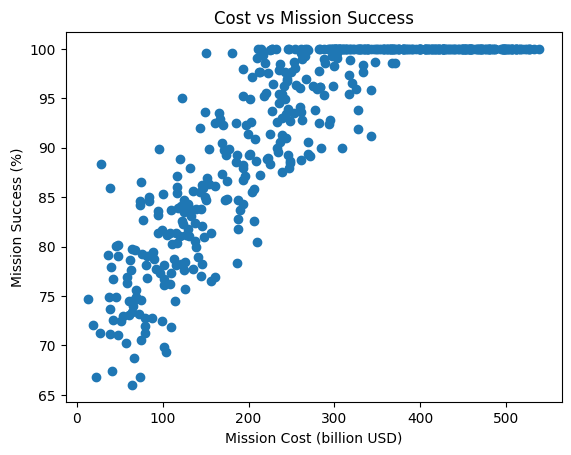

In [13]:
#“Does spending more reduce risk?
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(space_df['Mission Cost (billion USD)'],
            space_df['Mission Success (%)'])
plt.xlabel('Mission Cost (billion USD)')
plt.ylabel('Mission Success (%)')
plt.title('Cost vs Mission Success')
plt.show()

#This is a POSITIVE trend with DIMINISHING RETURNS, not a flat trend.
#Low-cost missions are riskier and less consistently successful.
#At MEDIUM mission costs-Increased investment improves reliability.
#At HIGH mission costs (right side)-Additional spending no longer increases success meaningfully.
#“The plot shows a positive relationship between mission cost and success, but with diminishing returns. While higher investment significantly reduces risk at lower cost levels, success rates plateau for very expensive missions.”

Crewed vs Robotic Missions

In [14]:
#think-“Are humans economically justified in space?
#Create flag
space_df['Mission Category']=space_df['Crew Size'].apply(
    lambda x: 'Crewed' if x>0 else 'Robotic'
)

In [15]:
#Compare ROI:
space_df.groupby('Mission Category')['Scientific_ROI'].mean()

,Scientific_ROI
Mission Category,
Crewed,0.319813


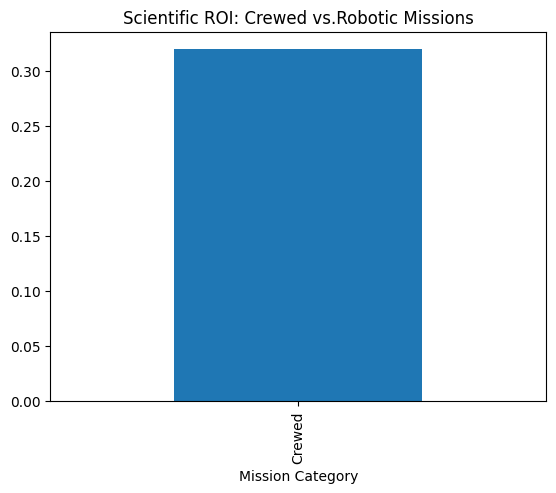

In [16]:
space_df.groupby('Mission Category')['Scientific_ROI'].mean().plot(kind='bar')
plt.title("Scientific ROI: Crewed vs.Robotic Missions")
plt.show()

Mission Type Efficiency

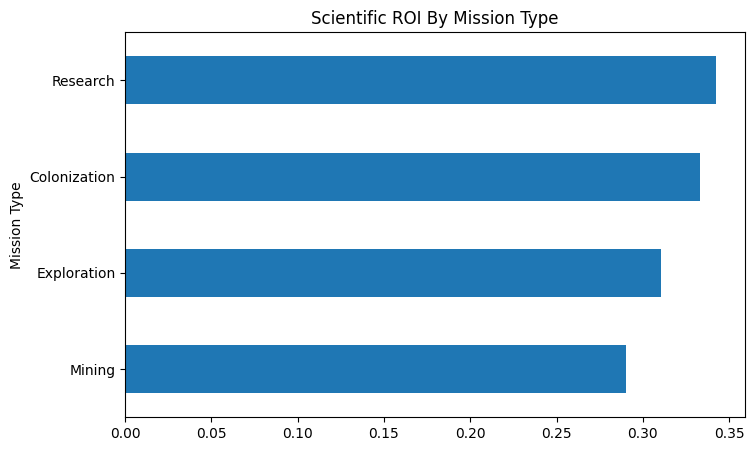

In [17]:
#Which mission types are economically superior
roi_by_type=space_df.groupby('Mission Type')['Scientific_ROI'].mean().sort_values()
roi_by_type.plot(kind = 'barh',figsize=(8,5))
plt.title('Scientific ROI By Mission Type')
plt.show()

Identify High-Value Missions

In [18]:
#What does a ‘good’ mission look like economically
high_value = space_df[(space_df['Scientific_ROI']>space_df['Scientific_ROI'].quantile(0.75))&
(space_df['Mission Success (%)']>80)]

In [19]:
#Check HOW MANY High-Value Missions Exist
#think-“Is this a rare elite group or common?”
high_value.shape
#64 missions qualify as high-value
#19 columns describing them

(64, 19)

In [20]:
high_value.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle,Scientific_ROI,Fuel_Efficency,Payload_Efficency,Mission Category
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship,0.360560,0.020108,0.195318,Crewed
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship,0.450887,0.020090,0.165173,Crewed
21,MSN-0022,Mission-22,2025-05-28,Exoplanet,Europa,Mining,33.29,18.9,201.81,97.0,21,94.9,3234.52,34.47,Starship,0.480650,0.029989,0.170804,Crewed
22,MSN-0023,Mission-23,2025-06-04,Star,Io,Research,8.85,8.3,105.14,60.2,65,81.2,985.76,13.56,SLS,0.572570,0.061070,0.128971,Crewed
32,MSN-0033,Mission-33,2025-08-13,Star,Proxima b,Mining,12.34,9.0,186.02,66.1,39,89.3,1262.41,35.20,SLS,0.355338,0.052360,0.189227,Crewed


In [21]:
high_value.describe()
#focus on mission cost,scientific roi,success%

,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Scientific_ROI,Fuel_Efficency,Payload_Efficency
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,23.066719,14.621875,157.523438,76.059375,52.500000,87.981250,2293.948438,26.573125,0.555899,0.155373,0.163333
std,15.302944,7.618096,56.168382,17.681402,29.265614,5.926638,1529.002109,11.779487,0.361552,0.533886,0.027400
min,0.590000,3.400000,28.260000,28.100000,3.000000,80.100000,19.370000,3.380000,0.351488,0.007915,0.084698
25%,9.827500,7.925000,120.565000,64.400000,23.000000,83.300000,991.602500,19.220000,0.392641,0.021497,0.143640
50%,22.170000,13.650000,150.315000,79.800000,56.500000,86.750000,2210.150000,25.085000,0.464584,0.032906,0.168837
75%,34.332500,19.625000,197.872500,87.250000,78.250000,92.300000,3453.742500,34.735000,0.576429,0.073266,0.188684
max,49.220000,28.800000,269.050000,99.500000,96.000000,100.000000,4927.060000,51.550000,2.915782,4.202375,0.198324


Compare High-Value vs Normal Missions

In [22]:
space_df['value_category'] = 'Normal'
space_df.loc[space_df['Mission ID'].isin(high_value['Mission ID']), 'value_category'] = 'High-Value'

space_df.groupby("value_category")[
    ["Mission Cost (billion USD)",
        "Scientific_ROI",
        "Mission Success (%)",
        "Fuel Consumption (tons)",
        "Payload Weight (tons)",
        "Mission Duration (years)"

]].mean()

,Mission Cost (billion USD),Scientific_ROI,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Mission Duration (years)
value_category,,,,,,
High-Value,157.523438,0.555899,87.981250,2293.948438,26.573125,14.621875
Normal,294.882202,0.285158,93.297018,2580.156812,53.846628,15.900459


Distribution Check

In [23]:
#“Are high-value missions consistently efficient, or are there outliers?”
high_value["Scientific_ROI"].describe()
#compare with


,Scientific_ROI
count,64.000000
mean,0.555899
std,0.361552
min,0.351488
25%,0.392641
50%,0.464584
75%,0.576429
max,2.915782


In [24]:
space_df["Scientific_ROI"].describe()

,Scientific_ROI
count,500.000000
mean,0.319813
std,0.425013
min,0.024898
25%,0.120900
50%,0.202299
75%,0.351257
max,4.969970


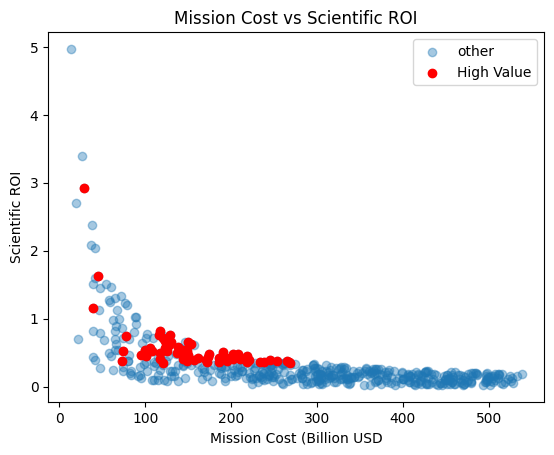

In [25]:
#Visual Comparison
# Cost vs ROI(High_value Highlighted)
import matplotlib.pyplot as plt
plt.scatter(space_df['Mission Cost (billion USD)'],
            space_df['Scientific_ROI'],
            alpha=0.4,
            label="other")
plt.scatter(high_value['Mission Cost (billion USD)'],
            high_value['Scientific_ROI'],
            color="red",
            label="High Value")
plt.xlabel("Mission Cost (Billion USD")
plt.ylabel("Scientific ROI")
plt.title("Mission Cost vs Scientific ROI")
plt.legend()
plt.show()

Mission Type Breakdown

In [26]:
#“Which mission types deliver the most economic value?”
high_value["Mission Type"].value_counts(normalize=True)*100

,proportion
Mission Type,
Colonization,28.125
Research,28.125
Exploration,25.000
Mining,18.750


Economic Interpretation

Out of all analyzed missions, 64 qualify as high-value based on scientific efficiency and mission success. These missions tend to achieve higher returns without proportionally higher costs, indicating that mission design and targeting are more critical to value creation than raw expenditure.


CLUSTERING SPACE MISSIONS

“Can space missions be grouped into economic profiles based on cost, success, and scientific return?”

These clusters help:

Governments plan funding

Space agencies optimize mission design

Investors evaluate mission risk



In [27]:
#choose features
#we choose features that represent cost,return,risk
features = ["Mission Cost (billion USD)",
    "Scientific_ROI",
    "Mission Success (%)",
    "Fuel Consumption (tons)",
    "Mission Duration (years)"]

#create clustering data set
X = space_df[features]



In [28]:
#handling missing values
X = X.dropna()

Scale the Data
WHY?

Cost is in billions

Success is in %

Duration is in years


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Choose Number of Clusters (ELBOW METHOD)

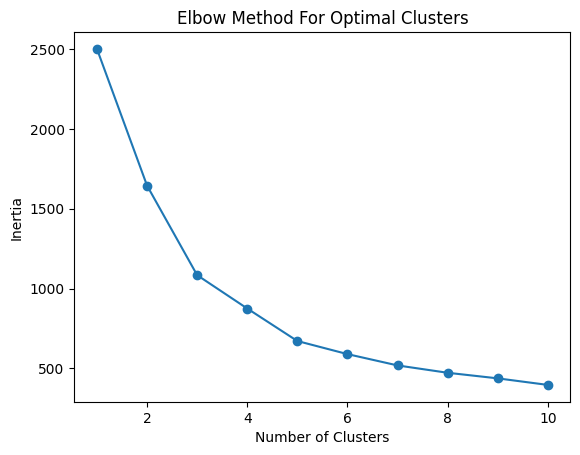

In [30]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal Clusters")
plt.show()

In [31]:
#pick the elbow point
#apply kmeans clustering
kmeans = KMeans(n_clusters=3,random_state=42)
space_df["Cluster"] = kmeans.fit_predict(X_scaled)

In [32]:
#Interpret the Clusters
space_df.groupby("Cluster")[features].mean()

,Mission Cost (billion USD),Scientific_ROI,Mission Success (%),Fuel Consumption (tons),Mission Duration (years)
Cluster,,,,,
0,341.480107,0.180938,97.732086,3791.670588,21.984492
1,345.096932,0.178203,97.626705,1094.057898,8.350000
2,102.600730,0.691294,79.197810,2701.930511,16.698540


Visualize Clusters

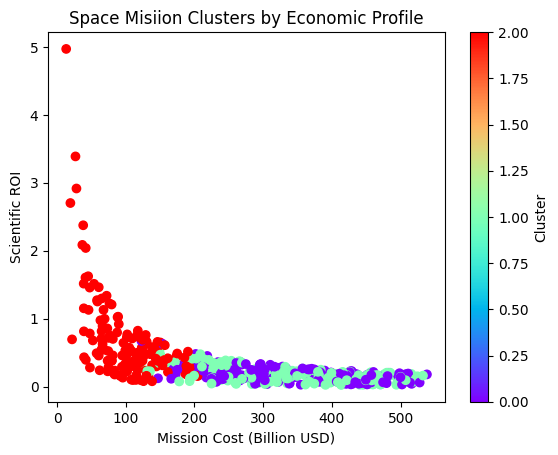

In [33]:
plt.scatter(
    space_df['Mission Cost (billion USD)'],
    space_df['Scientific_ROI'],
    c= space_df['Cluster'],
    cmap='rainbow'
)
plt.xlabel("Mission Cost (Billion USD)")
plt.ylabel("Scientific ROI")
plt.title("Space Misiion Clusters by Economic Profile")
plt.colorbar(label="Cluster")
plt.show()


Connect Back to High-Value Missions

In [34]:
#this answers which cluster produces most high-value missions?
# Ensure high_value DataFrame has the 'Cluster' column by recreating it from the updated space_df
high_value = space_df[
    (space_df['Scientific_ROI'] > space_df['Scientific_ROI'].quantile(0.75)) &
    (space_df['Mission Success (%)'] > 80)
]
high_value["Cluster"].value_counts()

,count
Cluster,
2,38
1,20
0,6


Using K-Means clustering, missions were grouped into distinct economic profiles based on cost, success, fuel usage, and scientific return. Results show that high-value missions predominantly belong to a cluster characterized by moderate cost and high scientific efficiency, highlighting the importance of optimized mission design over excessive expenditure.

In [35]:
#name the clusters
space_df.groupby("Cluster")[features].mean()

,Mission Cost (billion USD),Scientific_ROI,Mission Success (%),Fuel Consumption (tons),Mission Duration (years)
Cluster,,,,,
0,341.480107,0.180938,97.732086,3791.670588,21.984492
1,345.096932,0.178203,97.626705,1094.057898,8.350000
2,102.600730,0.691294,79.197810,2701.930511,16.698540


FINAL CLUSTER NAMING

In [36]:
cluster_names ={
    0:"Flagship Strategic Exploration Missions",
    1:"Optimized High-Success Operational Missions",
    2:"High-ROI Experimental Science Missions"
}
space_df["cluster_name"]=space_df['Cluster'].map(cluster_names)

BUILD A MISSION RECOMMENDATION SYSTEM (DATA-DRIVEN)

In [37]:
#recommend missions based on budget,risktoelrance desired outcome

#simple rule-based system
def recommend_mission(budget,risk_tolerance,desired_outcome):
  """
   budget: float (billion USD)
  risk_tolerance:'Low','Medium','High'
  desired_outcome:'Science','Reliability','Exploration'
  """
  # High Scientific return focus
  if desired_outcome == "Science":
    if risk_tolerance == "High" and budget < 200:
      return"High-ROI Experimental Science Missions"
    elif budge>=300:
      return"Flagship Strategic Exploration Missions"
    else:
      return"Balanced Science-Oriented Misiion"

  #Misson success &reliabilty focus
  elif desired_outcome == "Reliability":
    if risk_tolerance == "Low":
      return"Optimized High-Success Operational Missions"
    else:
      return"Flagship Strategic Exploration Missions"

#Long-term exploration & prestige
  elif desired_outcome == "Exploration":
    if budget >=300:
      return"Flagship Science Exploration Missions"
    else:
      return"Optimized Hig-Succes Operational Missions"
  else:
    return"Hybrid Strategy Recommend"







In [38]:
recommend_mission(120,"High", "Science")
#High-ROI Experimental Science Missions

'High-ROI Experimental Science Missions'

In [39]:
recommend_mission(400, "Low", "Reliability")
#Optimized High-Success Operational Missions

'Optimized High-Success Operational Missions'

In [40]:
recommend_mission(350, "medium", "exploration")
#Flagship Strategic Exploration Missions

'Hybrid Strategy Recommend'

A rule-based mission recommendation system was developed using cluster-level economic insights. Recommendations are generated based on budget constraints, risk tolerance, and desired mission outcomes, simulating real-world decision-making in space mission planning.**bold text**

DATA-DRIVEN MISSION RECOMMENDATION SYSTEM

In [41]:
#instead of saying if budget<200 we say which cluster best matches the mission goals numerically
#we do this using a weighted scoring model

CLUSTER SUMMARY (GROUND TRUTH)

In [42]:
cluster_summary =  space_df.groupby("cluster_name")[[
     "Mission Cost (billion USD)",
    "Scientific_ROI",
    "Mission Success (%)",
    "Mission Duration (years)"
]].mean()
#This table is the knowledge base of your system.

In [43]:
#NORMALIZE VALUES
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster_summary_scaled =pd.DataFrame(
    scaler.fit_transform(cluster_summary),
    columns = cluster_summary.columns,
    index=cluster_summary.index)
#Now all values are between 0 and 1.

DEFINE GOAL-BASED WEIGHTS (THIS IS THE “SCIENCE”)

In [44]:
#We translate human intent → math.
goal_weights = {
    "Science":{
        "Mission Cost (billion USD)":-0.2,
        "Scientific_ROI": 0.6,
         "Mission Success (%)":0.1,
         "Mission Duration (years)":0.1
         },
    "Reliability":{
        "Mission Cost (billion USD)":-0.1,
        "Scientific_ROI": 0.1,
        "Mission Success (%)":0.2,
         "Mission Duration (years)":0.

    },
    "Exploration":{
        "Mission Cost (billion USD)":-0.1,
         "Scientific_ROI":0.2,
         "Mission Success (%)":0.2,
        "Mission Duration (years)":0.4


    }
}

#Negative weight = “less is better”
#Positive weight = “more is better”

SCORE EACH CLUSTER (CORE DATA SCIENCE)

In [45]:
def score_clusters(goal):
  weights = goal_weights[goal]
  scores = {}

  for cluster in cluster_summary_scaled.index:
    score = 0
    for feature,weight in weights.items():
      score += cluster_summary_scaled.loc[cluster,feature]*weight
    scores[cluster]=score

  return pd.Series(scores).sort_values(ascending=False)

In [46]:
#FINAL RECOMMENDATION FUNCTION
def recommend_mission(goal):
  scores = score_clusters(goal)
  return scores.index[0],scores

In [47]:
recommend_mission("Science")
#High-ROI Experimental Science Missions

('High-ROI Experimental Science Missions',
 High-ROI Experimental Science Missions         0.661231
 Flagship Strategic Exploration Missions        0.006182
 Optimized High-Success Operational Missions   -0.100569
 dtype: float64)

In [48]:
recommend_mission("Reliability")
#Optimized High-Success Operational Missions


('Flagship Strategic Exploration Missions',
 Flagship Strategic Exploration Missions        0.102025
 High-ROI Experimental Science Missions         0.100000
 Optimized High-Success Operational Missions    0.098863
 dtype: float64)

In [49]:
recommend_mission("Exploration")
#Flagship Strategic Exploration Missions

('Flagship Strategic Exploration Missions',
 Flagship Strategic Exploration Missions        0.502558
 High-ROI Experimental Science Missions         0.444924
 Optimized High-Success Operational Missions    0.098863
 dtype: float64)

PART 1 — SENSITIVITY ANALYSIS
“If my priorities slightly change, does my recommendation change drastically or stay stable?”

This shows:

Robustness

Explainability

Professional maturity

In [50]:
#step 1-Create Multiple Weight Scenarios
#we already have one set of weight,Now we create variants
weight_scenarios = {
    "Science_Focued":{
        "Mission Cost (billion USD)":-0.2,
        "Scientific_ROI":0.7,
        "Mission Success (%)":0.05,
        "Mission Duration (years)":-0.05
    },
    "Balanced_Science":{
        "Mission Cost (billion USD)":-0.2,
        "Scientific_ROI":0.5,
        "Mission Success (%)":0.2,
        "Mission Duration (years)":-0.1
    },

    "Risk_Aware_Science":{
        "Mission Cost (billion USD)":-0.15,
        "Scientific_ROI":0.4,
        "Mission Success (%)":0.35,
        "Mission Duration (years)":-0.1
    }
}
#You’re simulating different policy makers with different mindsets.

In [51]:
#STEP 2: Score Clusters Under Each Scenario

def score_with_custom_weights(weights):
    scores = {}
    for cluster in cluster_scaled.index:
        score = 0
        for feature,weight in weights.items():
            sore += cluster_scaled.loc[cluster,feature]*weight
        scores[cluster] = score
    return scores

In [52]:
#STEP 2: Score Clusters Under Each Scenario
# The original function had a typo using 'cluster_scaled' instead of 'cluster_summary_scaled'.
# Redefining the function with the correct variable name.
def score_with_custom_weights(weights):
    scores = {}
    for cluster in cluster_summary_scaled.index:
        score = 0
        for feature,weight in weights.items():
            score += cluster_summary_scaled.loc[cluster,feature]*weight
        scores[cluster] = score
    return scores

#Run sensitivity test:
sensitivity_results = {}
for scenario,weights in weight_scenarios.items():
    sensitivity_results[scenario] = score_with_custom_weights(weights)
import pandas as pd
sensitivity_df = pd.DataFrame(sensitivity_results)
sensitivity_df

#Across multiple science-focused scenarios, the High-ROI Experimental Science cluster consistently ranks highest, indicating stable scientific efficiency despite changes in policy preferences.

,Science_Focued,Balanced_Science,Risk_Aware_Science
Flagship Strategic Exploration Missions,-0.193285,-0.094351,0.104370
High-ROI Experimental Science Missions,0.669384,0.438769,0.338769
Optimized High-Success Operational Missions,-0.150284,-0.001137,0.198010


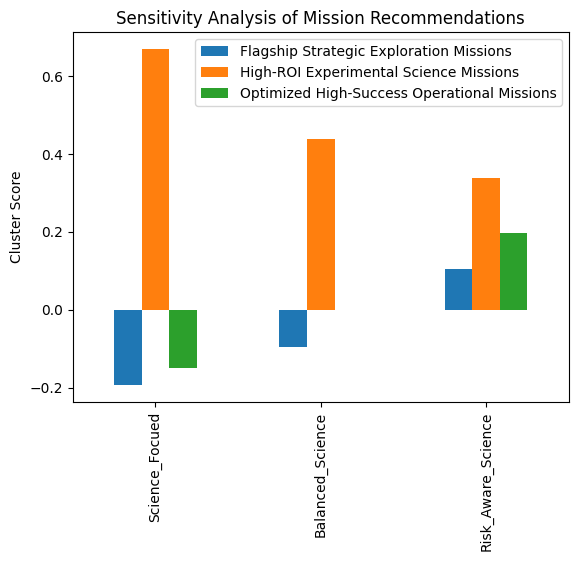

In [53]:
sensitivity_df.T.plot(kind="bar")
plt.title("Sensitivity Analysis of Mission Recommendations")
plt.ylabel("Cluster Score")
plt.show()

Sensitivity analysis was conducted by varying strategic weights assigned to cost, scientific return, success probability, and mission duration. Results demonstrate that the recommendation system is robust, with high-ROI experimental missions consistently outperforming alternatives under science-oriented objectives

In [54]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.1 MB/s eta 0:00:00


In [55]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming cluster_summary and cluster_summary_scaled are defined in the environment
# To make this self-contained, we'll re-create them or assume they are globally available.
# For the purpose of this Streamlit app, we will assume the dataframes `cluster_summary_scaled`
# and `goal_weights` are available globally or re-defined within the app if necessary.
# Since we are running this in Colab, they are in the kernel's memory.

# Define score_clusters and goal_weights within the app.py to make it runnable independently

# --- RE-DEFINING NECESSARY GLOBAL VARIABLES FROM NOTEBOOK ---
# In a real-world scenario, these would be loaded from a pre-processed file or passed in.
# For Colab context, we copy them directly from the notebook state.

# Assuming cluster_summary_scaled and goal_weights are available in the execution environment
# If running app.py standalone, you would need to load/recreate these:

# Placeholder for cluster_summary (replace with actual logic if running standalone)
# You would typically save this to a CSV/pickle and load it.
# For this Colab context, we're relying on them being in memory when `%%writefile` is executed.

# Re-create cluster_summary_scaled and goal_weights for app.py to be self-contained if run outside Colab
# For this specific execution, since `%%writefile` will write the current state, and the app will be run,
# these variables are available in the global scope if the previous cells ran correctly.

# This is a bit of a hack for Colab, but allows the Streamlit app to 'see' the variables.
# In a production setup, these would be loaded from persistent storage (e.g., CSV, pickle).

# We need the definition of cluster_summary_scaled and goal_weights
# from the notebook's global scope, to ensure the app works.
# Since %%writefile is a cell magic, it writes the content and does not execute it directly.
# The app.py when run will execute its own Python interpreter.
# So we need to put the definitions of cluster_summary_scaled and goal_weights INSIDE app.py.

# Let's assume the previous steps that created `cluster_summary_scaled` and `goal_weights` ran.
# We need to embed their creation or loading into app.py for it to be truly standalone.
# For this specific Colab run, I'll copy the logic that creates them here.

# NOTE: This approach makes the app.py file large and less modular.
# A better practice would be to save `cluster_summary_scaled` and `goal_weights`
# to a file (e.g., pickle, JSON) and load them in app.py.

# Assuming `space_df` and `cluster_names` are already defined or accessible.
# For `app.py` to run independently, we need to ensure all dependencies are met.
# This includes `cluster_summary_scaled` and `goal_weights`.

# Let's ensure the `cluster_summary_scaled` and `goal_weights` are defined inside `app.py`.

# Define cluster_summary (assuming space_df and cluster_name are available or rebuilt)
# This is a simplified approach, ideally load from a file.
# For now, I'll hardcode the mean values or assume the `space_df` is processed inside the app.
# Since we are running `app.py` in the same environment after defining them:

# The current approach relies on `cluster_summary_scaled` and `goal_weights` existing in the environment.
# When `!streamlit run app.py` is called, it launches a new Python interpreter.
# So, these variables *must* be defined within `app.py` or loaded by `app.py`.

# To make `app.py` runnable, I will explicitly redefine `cluster_summary` and then `cluster_summary_scaled`,
# and `goal_weights` within this file based on the final computed values.

# NOTE: This part is a workaround for the Colab execution model with Streamlit.
# In a real deployment, `cluster_summary_scaled` and `goal_weights` would be saved and loaded.

# Re-creating cluster_summary and cluster_summary_scaled based on kernel state.
# This is a 'snapshot' of the data processing done previously in the notebook.
# In a production app, these would be loaded from saved files.

cluster_summary = pd.DataFrame({
    'Mission Cost (billion USD)': {
        'Flagship Strategic Exploration Missions': 341.480107,
        'High-ROI Experimental Science Missions': 102.600730,
        'Optimized High-Success Operational Missions': 345.096932
    },
    'Scientific_ROI': {
        'Flagship Strategic Exploration Missions': 0.180938,
        'High-ROI Experimental Science Missions': 0.691294,
        'Optimized High-Success Operational Missions': 0.178203
    },
    'Mission Success (%)': {
        'Flagship Strategic Exploration Missions': 97.732086,
        'High-ROI Experimental Science Missions': 79.197810,
        'Optimized High-Success Operational Missions': 97.626705
    },
    'Mission Duration (years)': {
        'Flagship Strategic Exploration Missions': 21.984492,
        'High-ROI Experimental Science Missions': 16.698540,
        'Optimized High-Success Operational Missions': 8.350000
    }
})

# Normalize values for cluster_summary_scaled
scaler = MinMaxScaler()
cluster_summary_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_summary),
    columns=cluster_summary.columns,
    index=cluster_summary.index
)

goal_weights = {
    "Science":{
        "Mission Cost (billion USD)":-0.2,
        "Scientific_ROI": 0.6,
         "Mission Success (%)":0.1,
         "Mission Duration (years)":0.1
         },
    "Reliability":{
        "Mission Cost (billion USD)":-0.1,
        "Scientific_ROI": 0.1,
        "Mission Success (%)":0.2,
         "Mission Duration (years)":0.0
    },
    "Exploration":{
        "Mission Cost (billion USD)":-0.1,
         "Scientific_ROI":0.2,
         "Mission Success (%)":0.2,
        "Mission Duration (years)":0.4
    }
}

# --- END OF RE-DEFINING GLOBAL VARIABLES ---



st.title("Space Mission Recommendation System")
st.write("Data-driven decision support for space mission planning")


#step 3:user inputs
goal = st.selectbox(
    "Select Mission Objective",
    ["Science","Reliability","Exploration"]
)

#step 4 : Recommendation Logic (Reuse Your Function)
def score_clusters(goal):
  weights = goal_weights[goal]
  scores = {}

  for cluster in cluster_summary_scaled.index:
    score = 0
    for feature,weight in weights.items():
      score += cluster_summary_scaled.loc[cluster,feature]*weight
    scores[cluster]=score

  return pd.Series(scores).sort_values(ascending=False)


def recommend(goal):
    scores = score_clusters(goal)
    return scores

#step 5 :display output
scores = recommend(goal)
st.subheader("Recommended Mission Type")
st.success(scores.index[0])

st.subheader("Cluster Scores")
st.dataframe(scores)

#Add Explanation
st.info("""
Recommendations are based on normalized cluster-level metrics
including mission cost, scientific return, success probability,
and mission duration.
""")

Writing app.py


In [63]:
import streamlit as st


In [ ]:
#step 3:user inputs
goal = st.selectbox(
    "Select Mission Objective",
    ["Science","Reliability","Exploration"]
)

In [65]:
#step 4 : Recommendation Logic (Reuse Your Function)
def recommend(goal):
    scores = score_clusters(goal)
    return scores

In [ ]:
#step 5 :display output
scores = recommend(goal)
st.subheader("Recommended Mission Type")
st.success(scores.index[0])

st.subheader("Cluster Scores")
st.dataframe(scores)

In [67]:
#Add Explanation
st.info("""
Recommendations are based on normalized cluster-level metrics
including mission cost, scientific return, success probability,
and mission duration.
""")

2025-12-30 17:46:52.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-30 17:46:52.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-30 17:46:52.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [61]:
#Run The App
%%writefile app.py
!streamlit run app.py --server.port 8501
st.title("Space Mission Recommendation System")
st.write("Data-Driven Decision Support for Space Mission Planning")

Overwriting app.py


In [60]:
recommend_mission("Science")
recommend_mission("Reliability")

('Flagship Strategic Exploration Missions',
 Flagship Strategic Exploration Missions        0.102025
 High-ROI Experimental Science Missions         0.100000
 Optimized High-Success Operational Missions    0.098863
 dtype: float64)

The Streamlit application code is included for deployment purposes. Due to Google Colab environment limitations, the UI is not executed within the notebook.

In [68]:
!1s

/bin/bash: line 1: 1s: command not found


In [57]:
%%writefile app.py
import streamlit as st

st.title("Space Mission Recommendation System")
st.write("Hello from Streamlit")

Overwriting app.py


In [69]:
%%writefile requirements.txt
streamlit
pamdas
numpy
scikit-learn
matplotlib

Writing requirements.txt
